In [19]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  
y = iris.target 

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

x_train

array([[-1.50652052e+00,  1.24920112e+00, -1.56757623e+00,
        -1.31544430e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
        -1.05217993e+00],
       [ 1.03800476e+00,  9.82172869e-02,  3.64896281e-01,
         2.64141916e-01],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [ 6.74501145e-01,  3.28414053e-01,  4.21733708e-01,
         3.95774101e-01],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
        -1.44707648e+00],
       [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
         9.22302838e-01],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
      

Text(6, 0.9696666666666668, 'best k value is: 6')

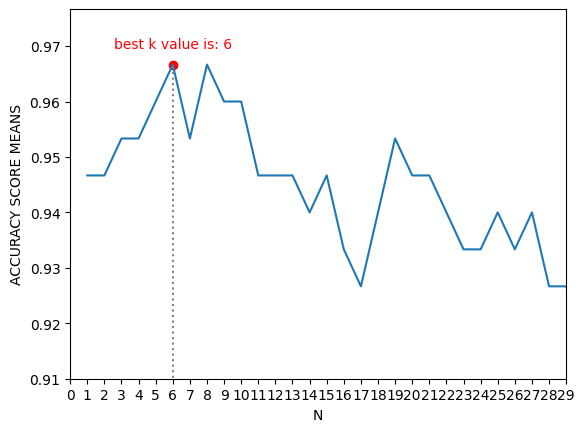

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1,31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]

plt.plot(k_values, cv_scores)
plt.xlabel("N")
plt.ylabel("ACCURACY SCORE MEANS")
plt.scatter(x=best_k, y=max(cv_scores), color='red')
plt.axis([0,21, min(cv_scores) - 0.01, max(cv_scores)+0.01])
plt.vlines(best_k, 0, max(cv_scores), colors='gray', linestyles='dotted', label='İzdüşüm')
plt.xticks(range(len(k_values)))

plt.text(best_k, max(cv_scores)+0.003, "best k value is: " + str(best_k), fontsize=10 , color='red', ha='center')

In [22]:
from sklearn.metrics import accuracy_score

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

train_pred_knn = best_knn.predict(x_train)
test_pred_knn = best_knn.predict(x_test)

print(accuracy_score(y_train, train_pred_knn))
print(accuracy_score(y_test, test_pred_knn))

0.9583333333333334
1.0


In [23]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

log = LogisticRegression()

log.fit(X_train, y_train)

train_pred_log = log.predict(X_train)
test_pred_log = log.predict(X_test)

print(accuracy_score(y_train, train_pred_log))
print(accuracy_score(y_test, test_pred_log))

0.975
1.0


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1)

grid_search_svc.fit(X_train, y_train)

train_pred_svc = grid_search_svc.predict(X_train)
test_pred_svc = grid_search_svc.predict(X_test)

print(accuracy_score(y_train, train_pred_svc))
print(accuracy_score(y_test, test_pred_svc))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.975
1.0


In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search_dtc = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, verbose=1)

grid_search_dtc.fit(X_train, y_train)

train_pred_dtc = grid_search_dtc.predict(X_train)
test_pred_dtc = grid_search_dtc.predict(X_test)

print(accuracy_score(y_train, train_pred_dtc))
print(accuracy_score(y_test, test_pred_dtc))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
0.9523809523809523
1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]  
}

grid_search_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=1)

grid_search_rfc.fit(X_train, y_train)

train_pred_rfc = grid_search_dtc.predict(X_train)
test_pred_rfc = grid_search_dtc.predict(X_test)

print(accuracy_score(y_train, train_pred_rfc))
print(accuracy_score(y_test, test_pred_rfc))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
